In [1]:
from collections import Counter
import re
import datetime
import os

import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
DATA_DIR = '../../data/'

TRAIN_OUTPUT_FILENAME = f'{DATA_DIR}clean/misconduct_train.pkl'
TEST_OUTPUT_FILENAME = f'{DATA_DIR}clean/misconduct_test.pkl'

In [3]:
def normalize_column_name(string):
    return re.sub('\s', '_', string).lower()

In [4]:
misconduct = pd.read_csv(f'{DATA_DIR}contractor_misconduct.csv')

In [5]:
# standardize column names
misconduct['Contractor_s'] = misconduct['Contractor(s)']
misconduct = misconduct.drop('Contractor(s)', axis=1)

misconduct.columns = [normalize_column_name(col) for col in misconduct.columns]

In [6]:
# restore improperly parsed values
misconduct['court_type'] = misconduct['court_type'].replace(np.nan, 'N/A')
# but clear these
misconduct['court_type'] = misconduct['court_type'].replace('Undisclosed/unknown', np.nan)
misconduct['total_penalties'] = misconduct['total_penalties'].replace(
    'Undisclosed/Unknown',
    np.nan
)
# (note: capitalization discrepency in 'unknown')

In [7]:
# casting
misconduct.loc[:, 'total_penalties'] = misconduct.loc[:, 'total_penalties'].astype(float)
misconduct.loc[:, 'date'] = pd.to_datetime(
    misconduct.loc[:, 'date'],
    format='%m/%d/%Y'
)

In [8]:
misconduct_train, misconduct_test = train_test_split(
    misconduct,
    test_size=0.2,
    random_state=83
)

In [9]:
os.system(f'touch {TRAIN_OUTPUT_FILENAME}')
with open(TRAIN_OUTPUT_FILENAME, 'wb') as train_file:
    pickle.dump(misconduct_train, train_file)

os.system(f'touch {TEST_OUTPUT_FILENAME}')
with open(TEST_OUTPUT_FILENAME, 'wb') as test_file:
    pickle.dump(misconduct_test, test_file)

In [50]:
misconduct_train[
    (misconduct_train.disposition_type != 'Pending') &
    (~ misconduct_train.disposition_type.isnull()) &
    (misconduct_train.contracting_party != 'None')
].sort_values('date', ascending=False)[:19]

,instance,date_type,date,misconduct_type,disposition_type,court_type,enforcement_agency,contracting_party,total_penalties,contractor_s
1576,Contracting Suspension - Anham FZCO and Anham USA,Date of Suspension,2018-12-27,Government Contract Fraud,Suspend/Debar - Company,Administrative,Defense - General,Defense - General,0.0,Anham FZCO
1094,Contracting Suspension - Abul Huda Farouki,Date of Suspension,2018-12-17,Government Contract Fraud,Suspend/Debar - Employee,Administrative,Defense - General,Defense - General,0.0,Anham FZCO
2327,Rigging Bids on Department of Defense Fuel Sup...,Date of Settlement Announcement,2018-11-14,Government Contract Fraud,Settlement,Civil,Justice,Defense - General,90384872.0,"SK Holdings Co., Ltd."
2217,Rigging Bids on Department of Defense Fuel Sup...,Date of Plea Announcement,2018-11-14,Government Contract Fraud,Pleaded Guilty,Criminal,Multiple Agencies,Defense - General,34079185.0,"SK Holdings Co., Ltd."
1881,Air Force Battlefield Communications Contracts...,Date of Settlement Announcement,2018-11-02,Government Contract Fraud,Settlement,Civil,Multiple Agencies,Defense - Air Force,27450000.0,Northrop Grumman
1176,Audit of Justice Management Division MEGA 4 Co...,Date of Report,2018-10-31,Cost/Labor Mischarge,Investigative Finding,N/A,Justice,Justice,0.0,"CACI International, Inc."
728,Vandenberg Air Force Base Superfund Cleanup Costs,Date of Consent Decree,2018-07-30,Environment,Settlement,Civil,Defense - Air Force,Defense - Air Force,250000.0,Honeywell International Inc.
1696,NSA Contract Labor Mischarge,Date of Settlement Announcement,2018-07-06,Cost/Labor Mischarge,Settlement,Civil,Justice,NSA,1531929.0,"CACI International, Inc."
1657,Alleged Hanford Site Small Business Subcontrac...,Date of Settlement Announcement,2018-06-07,Government Contract Fraud,Settlement,Civil,Justice,Energy,NaN,"AECOM Technology Corporation, Bechtel Corporat..."
183,Hunters Point Naval Shipyard Cleanup - Crimina...,Date of Sentencing Announcement,2018-05-03,Government Contract Fraud,Pleaded Guilty,Criminal,Justice,Defense - Navy,12000.0,"Tetra Tech, Inc."


In [58]:
misconduct_train.loc[
    [
        740,
        854,
        1569,
        1616,
#         1639,
        2217
    ],
    [
        'instance',
        'contractor_s',
        'contracting_party',
        'misconduct_type',
        'enforcement_agency',
        'court_type',
        'disposition_type',
        'total_penalties'
    ]
].iloc[4, 0]

'Rigging Bids on Department of Defense Fuel Supply Contracts - Criminal Prosecution'

([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.

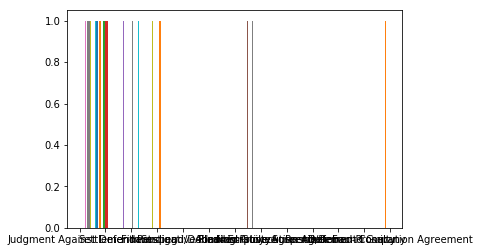

In [59]:
plt.hist(misconduct_train.disposition_type)